# Import required libraries

In [75]:
import glob

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read image

In [76]:
path = "./input/set2/"

images = []

for img_path in glob.glob(path + '*.jpg'):
    images.append(cv.imread(img_path, 0))

original_images = images

### Show all images

In [77]:
def show_all_images(showed_images=images, image_titles=None):
    if image_titles is None:
        image_titles = []

    plt.figure(figsize=(20, 10))
    columns = 4

    for i, image in enumerate(showed_images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)

        if image_titles:
            plt.title(image_titles[i])

        plt.imshow(image, cmap='gray')

C:\Users\calll\AppData\Local\Temp/ipykernel_27416/382859453.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


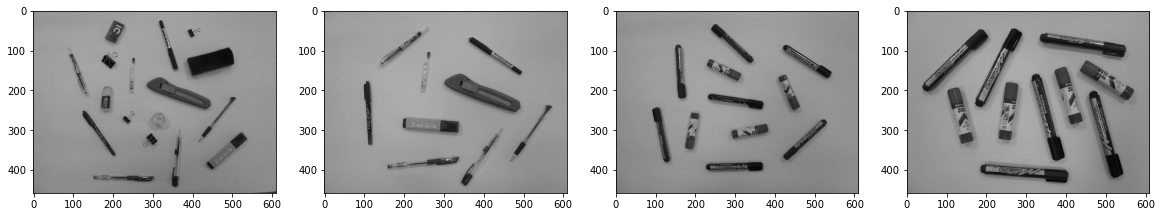

In [78]:
show_all_images(original_images)

# Increase contrast using Gamma

Help to distinguish object from background

In [79]:
def adjust_image_gamma(image, gamma=1.7):
    image = np.power(image, gamma)
    max_val = np.max(image.ravel())
    image = image / max_val * 255
    image = image.astype(np.uint8)
    return image


C:\Users\calll\AppData\Local\Temp/ipykernel_27416/382859453.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


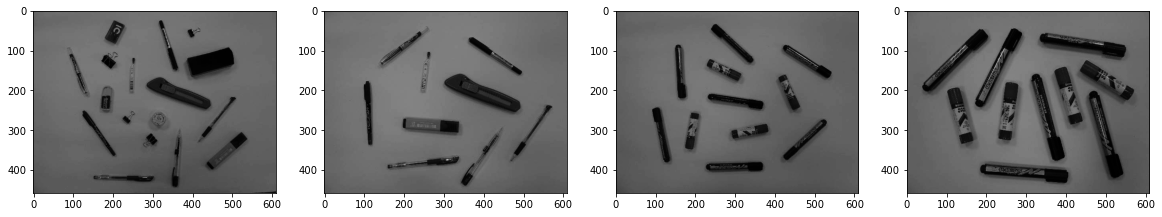

In [80]:
images = list(map(adjust_image_gamma, images))

show_all_images(images)

# Gaussian blur

C:\Users\calll\AppData\Local\Temp/ipykernel_27416/382859453.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


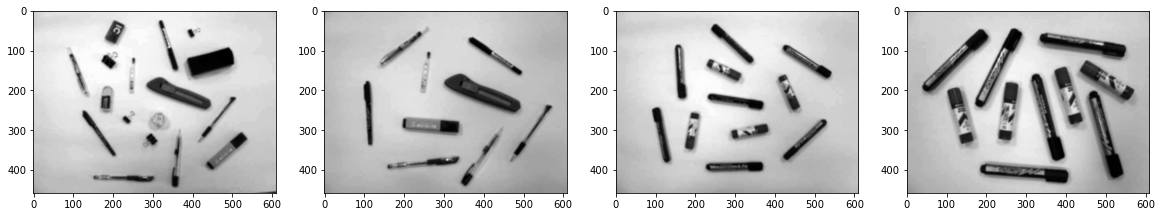

In [81]:
def apply_gaussian_blur(image):
    return cv.GaussianBlur(image, (7, 7), 0)


images = list(map(apply_gaussian_blur, images))

show_all_images(images)

# Apply adaptive thresholding using the mean threshold method

C:\Users\calll\AppData\Local\Temp/ipykernel_27416/382859453.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


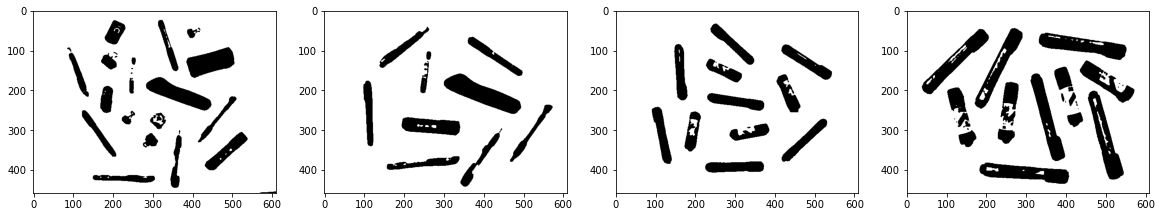

In [82]:
def apply_thresh_hold(image):
    return cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 201, 10)


images = list(map(apply_thresh_hold, images))

show_all_images(images)

# Morphological erosion
Xói mòn nhằm loại bỏ những pixel nhiễu xung quanh đối tượng làm cho phần viền đối tượng trở nên mịn hơn, nhỏ hơn và tách được các đối tượng chạm vào nhau

kernel sẽ trượt qua tất cả pixel của ảnh. Một pixel được set là 1 nếu tất cả các pixel trong kernel là 1 và ngược lại sẽ bị chuyển thành 0.

C:\Users\calll\AppData\Local\Temp/ipykernel_27416/382859453.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


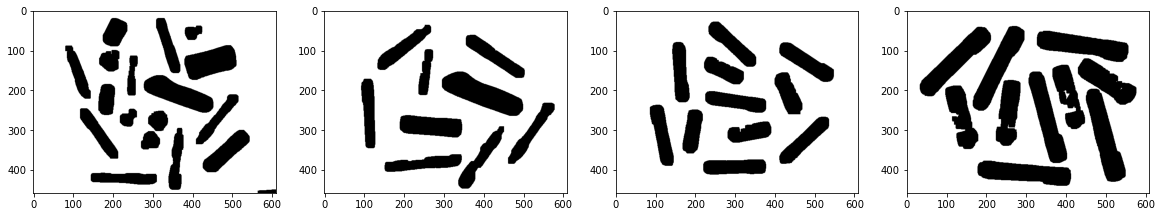

In [83]:
def apply_morphological_erosion(image):
    kernel = np.ones((11, 11), np.uint8)  #set 1
    return cv.erode(image, kernel)

images = list(map(apply_morphological_erosion, images))

show_all_images(images)

# Add counting number to each contour function

In [84]:
def draw_contour(image, c, i):
    # compute the center of the contour area and draw a circle
    # representing the center
    m = cv.moments(c)

    if m["m00"] != 0:
        c_x = int(m["m10"] / m["m00"])
        c_y = int(m["m01"] / m["m00"])
    else:
        c_x = 0
        c_y = 0

    # draw the countour number on the image
    cv.putText(image, "#{}".format(i + 1), (c_x - 20, c_y), cv.FONT_HERSHEY_SIMPLEX,
               1, (255, 255, 255), 1)
    # return the image with the contour number drawn on it
    return image

# Draw contours

C:\Users\calll\AppData\Local\Temp/ipykernel_27416/382859453.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


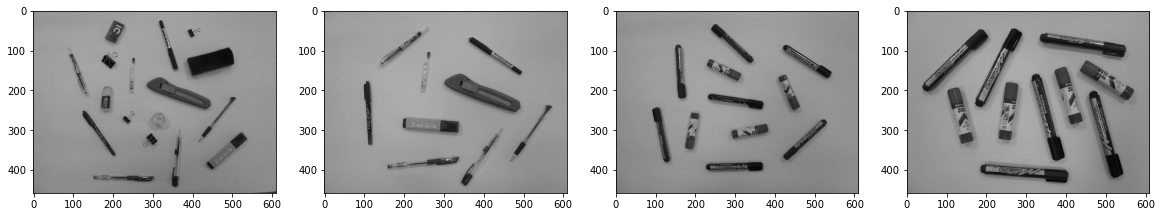

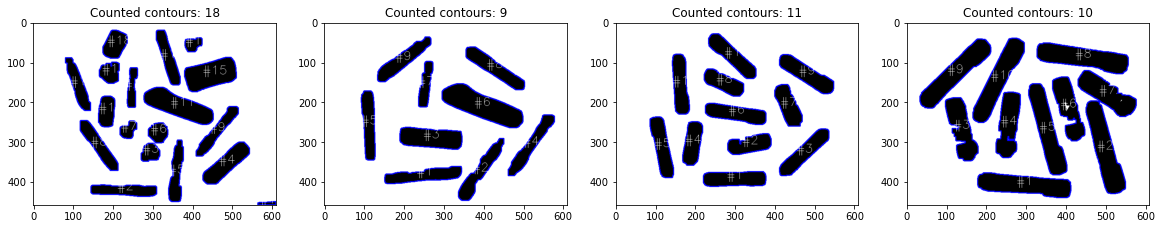

In [85]:
titles = []
def apply_find_contours(image):

    contours, _ = cv.findContours(~image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    titles.append('Counted contours: ' + str(len(contours)))

    # Draw contour
    output_contour = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
    image = cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)

    for (i, c) in enumerate(contours):
        orig = draw_contour(image, c, i)

    return image

images = list(map(apply_find_contours, images))

show_all_images(original_images)
show_all_images(images, titles)